In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cd /content/drive/MyDrive/Hl_phd

In [3]:
!pip install pycaret

     |████████████████████████████████| 266 kB 34.8 MB/s 
     |████████████████████████████████| 86 kB 6.6 MB/s 
     |████████████████████████████████| 2.0 MB 46.9 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 261 kB 44.1 MB/s 
     |████████████████████████████████| 271 kB 56.2 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 1.3 MB 34.6 MB/s 
     |████████████████████████████████| 1.7 MB 41.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 59.3 MB/s 
     |████████████████████████████████| 167 kB 60.8 MB/s 
     |████████████████████████████████| 6.8 MB 40.2 MB/s 
     |████████████████████████████████| 3.1 MB 39.1 MB/s 
     |████████████████████████████████| 10.1 MB 38.0 MB/s 
     |█████████████████

In [4]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [5]:
import pandas as pd

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Hl_phd/export_dataframe_prod2.csv')

In [7]:
pd.set_option('display.max_rows', None)
dataset

,subsite_store,shipment_state,total,currency,bill_city,bill_zipcode,bill_country_iso_name,quantity,completed_year,completed_month,completed_day
0,Klippkungen,shipped,580.70,SEK,Loftahammar,59095,SE,1,2018,9,17
1,Klippkungen,shipped,953.00,SEK,Uppsala,75653,SE,2,2019,2,14
2,Klippkungen,shipped,297.00,SEK,Anderstorp,33433,SE,1,2018,9,24
3,Klippkungen,shipped,426.00,SEK,MALMÖ,21455,SE,1,2018,10,6
4,Klippkungen,shipped,847.00,SEK,SORUNDA,14897,SE,1,2018,5,23
5,Klippkungen,ready,1632.00,SEK,TIMMELE,52392,SE,1,2018,6,17
6,Klippkungen,shipped,1459.00,SEK,NYNÄSHAMN,14931,SE,1,2018,11,15
7,Klippkungen,shipped,237.00,SEK,Moheda,34262,SE,1,2018,12,5
8,Klippkungen,shipped,910.00,SEK,VÄSTERÅS,72591,SE,1,2018,12,17
9,Klippkungen,shipped,603.91,SEK,DEJE,66930,SE,1,2018,8,17


In [8]:
dataset.shape

(2195, 11)

In [9]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2085, 11)
Unseen Data For Predictions: (110, 11)


In [10]:
from pycaret.clustering import *

exp_clu101 = setup(data, normalize = True,session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(2085, 11)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,9
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2085, 2656)"
9,CPU Jobs,-1


In [11]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1093,276.4158,1.7484,0,0,0


In [12]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,subsite_store,shipment_state,total,currency,bill_city,bill_zipcode,bill_country_iso_name,quantity,completed_year,completed_month,completed_day,Cluster
0,Klippkungen,shipped,615.00,SEK,Edane,67170,SE,1,2019,7,28,Cluster 3
1,Klippkungen,shipped,336.00,NOK,Stavern,3290,NO,1,2018,11,6,Cluster 1
2,Klippkungen,shipped,326.00,SEK,Ingelstad,355 71,SE,1,2020,3,28,Cluster 3
3,Klippkungen,shipped,637.00,SEK,Göteborg,41523,SE,1,2019,11,5,Cluster 0
4,Klippkungen,shipped,757.69,DKK,Brøndby,2605,DK,1,2019,10,18,Cluster 1


In [13]:
plot_model(kmeans)

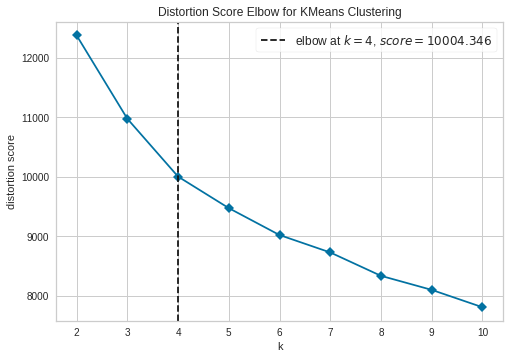

In [14]:
plot_model(kmeans, plot = 'elbow')

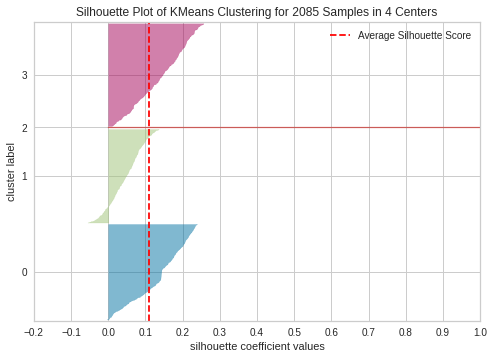

In [15]:
plot_model(kmeans, plot = 'silhouette')

In [16]:
plot_model(kmeans, plot = 'distribution')

In [17]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [18]:
Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b
Silhouette score, S, for each sample is calculated using the following formula:

\(S = \frac{(b - a)}{max(a, b)}\)

The value of the Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

SyntaxError: ignored

In [ ]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()
